<a href="https://colab.research.google.com/github/Kashishgarg21/Edunet-Project/blob/main/Sentiment_analysis_of_restaurant_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [4]:
# shape = tuple of array dimension(row,column)
data.shape

(1000, 2)

In [5]:
# Returns the label of each column in the DataFrame
data.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
# View the data
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
# Information about the DataFrame
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [8]:
good_reviews_count = len(data.loc[data['Liked'] == 1])
bad_reviews_count=len(data.loc[data['Liked']==0])
(good_reviews_count, good_reviews_count)

(500, 500)

In [9]:
#Data Cleaning
# Cleaning the Text
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
corpus = []
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    #remove negative word 'not' as it is closest word to help determine whether the review is good or not
    review = [stemmer.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [11]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [12]:
# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=12)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Naive Bayes

In [14]:
#MultinomialNB
mnb = MultinomialNB(alpha=2)
cv = cross_val_score(mnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(y_pred_mnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_mnb)
print(cm)
classification_report(y_test, y_pred_mnb)

[0.76119403 0.80597015 0.71641791 0.79104478 0.79104478 0.71641791
 0.79104478 0.82089552 0.78787879 0.77272727 0.87878788 0.84848485]
79.01590532187547
The accuracy of the Naive Bayes is 79.0
[[78 19]
 [23 80]]


'              precision    recall  f1-score   support\n\n           0       0.77      0.80      0.79        97\n           1       0.81      0.78      0.79       103\n\n    accuracy                           0.79       200\n   macro avg       0.79      0.79      0.79       200\nweighted avg       0.79      0.79      0.79       200\n'

In [15]:
#GaussianNB
gnb = GaussianNB(var_smoothing=1e-2)
cv = cross_val_score(gnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(y_pred_gnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_gnb)
print(cm)
classification_report(y_test, y_pred_gnb)

[0.67164179 0.68656716 0.76119403 0.70149254 0.68656716 0.65671642
 0.73134328 0.7761194  0.63636364 0.65151515 0.78787879 0.72727273]
70.62226745062567
The accuracy of the Naive Bayes is 74.0
[[60 37]
 [15 88]]


'              precision    recall  f1-score   support\n\n           0       0.80      0.62      0.70        97\n           1       0.70      0.85      0.77       103\n\n    accuracy                           0.74       200\n   macro avg       0.75      0.74      0.73       200\nweighted avg       0.75      0.74      0.74       200\n'

In [16]:
#Bernoulli NB
bnb = BernoulliNB(alpha=10)
cv = cross_val_score(bnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
mnb.fit(X_train,y_train)
y_pred_bnb=mnb.predict(X_test)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(y_pred_bnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_bnb)
print(cm)
classification_report(y_test, y_pred_bnb)

[0.74626866 0.80597015 0.79104478 0.7761194  0.7761194  0.76119403
 0.80597015 0.80597015 0.77272727 0.78787879 0.87878788 0.78787879]
79.13274536408863
The accuracy of the Naive Bayes is 79.0
[[78 19]
 [23 80]]


'              precision    recall  f1-score   support\n\n           0       0.77      0.80      0.79        97\n           1       0.81      0.78      0.79       103\n\n    accuracy                           0.79       200\n   macro avg       0.79      0.79      0.79       200\nweighted avg       0.79      0.79      0.79       200\n'

Random Forest Classifier

In [17]:
#Random Forest Classifier
rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       max_features='log2', min_samples_leaf=2,
                       n_estimators=500, random_state=0)
rf.fit(X_train, y_train)
cv = cross_val_score(rf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_rf = rf.predict(X_test)
print('The accuracy of the RandomForestClassifier is',metrics.accuracy_score(y_pred_rf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_rf)
print(cm)
classification_report(y_test, y_pred_rf)

[0.79104478 0.80597015 0.76119403 0.80597015 0.7761194  0.80597015
 0.7761194  0.76119403 0.8030303  0.75757576 0.90909091 0.83333333]
79.8884366048545
The accuracy of the RandomForestClassifier is 80.0
[[88  9]
 [31 72]]


'              precision    recall  f1-score   support\n\n           0       0.74      0.91      0.81        97\n           1       0.89      0.70      0.78       103\n\n    accuracy                           0.80       200\n   macro avg       0.81      0.80      0.80       200\nweighted avg       0.82      0.80      0.80       200\n'

Logistic Regression

In [18]:
#Logistic Regression
lr = LogisticRegression(random_state=0, C=0.82286, max_iter=2000, solver='lbfgs')
cv = cross_val_score(lr,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred_lr,y_test)*100)
cm=confusion_matrix(y_test, y_pred_lr)
print(cm)
classification_report(y_test, y_pred_lr)

[0.7761194  0.82089552 0.73134328 0.80597015 0.7761194  0.74626866
 0.8358209  0.88059701 0.78787879 0.77272727 0.90909091 0.77272727]
80.12965475652042
The accuracy of the Logistic Regression is 78.0
[[81 16]
 [28 75]]


'              precision    recall  f1-score   support\n\n           0       0.74      0.84      0.79        97\n           1       0.82      0.73      0.77       103\n\n    accuracy                           0.78       200\n   macro avg       0.78      0.78      0.78       200\nweighted avg       0.78      0.78      0.78       200\n'

SVC

In [19]:
#Linear SVC
svcl = SVC(kernel = 'linear', random_state = 0, probability=True)
svcl.fit(X_train, y_train)
cv = cross_val_score(svcl,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_svcl = svcl.predict(X_test)
print('The accuracy of the Linear SVC is',metrics.accuracy_score(y_pred_svcl,y_test)*100)
cm=confusion_matrix(y_test, y_pred_svcl)
print(cm)
classification_report(y_test, y_pred_svcl)

[0.7761194  0.82089552 0.74626866 0.79104478 0.7761194  0.76119403
 0.82089552 0.88059701 0.75757576 0.72727273 0.83333333 0.74242424]
78.61450324136891
The accuracy of the Linear SVC is 79.0
[[79 18]
 [24 79]]


'              precision    recall  f1-score   support\n\n           0       0.77      0.81      0.79        97\n           1       0.81      0.77      0.79       103\n\n    accuracy                           0.79       200\n   macro avg       0.79      0.79      0.79       200\nweighted avg       0.79      0.79      0.79       200\n'

In [20]:
#rbf SVC
from sklearn.svm import SVC
svck = SVC(kernel = 'rbf', random_state = 0, probability=True)
svck.fit(X_train, y_train)
cv = cross_val_score(svck,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_svck = svck.predict(X_test)
print('The accuracy of the Kernel SVC is',metrics.accuracy_score(y_pred_svck,y_test)*100)
cm=confusion_matrix(y_test, y_pred_svck)
print(cm)
classification_report(y_test, y_pred_svck)

[0.7761194  0.80597015 0.74626866 0.79104478 0.79104478 0.80597015
 0.80597015 0.79104478 0.75757576 0.74242424 0.89393939 0.83333333]
79.50587969244687
The accuracy of the Kernel SVC is 78.0
[[89  8]
 [36 67]]


'              precision    recall  f1-score   support\n\n           0       0.71      0.92      0.80        97\n           1       0.89      0.65      0.75       103\n\n    accuracy                           0.78       200\n   macro avg       0.80      0.78      0.78       200\nweighted avg       0.81      0.78      0.78       200\n'

Decision Tree Classifier

In [21]:
#Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0, max_depth=30, min_samples_split=5, min_samples_leaf=1)
dt.fit(X_train, y_train)
cv = cross_val_score(dt,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_dt = dt.predict(X_test)
print('The accuracy of the Decision Tree Classifier is',metrics.accuracy_score(y_pred_dt,y_test)*100)
cm=confusion_matrix(y_test, y_pred_dt)
print(cm)
classification_report(y_test, y_pred_dt)

[0.70149254 0.7761194  0.73134328 0.82089552 0.80597015 0.85074627
 0.79104478 0.73134328 0.81818182 0.8030303  0.83333333 0.77272727]
78.63523292627771
The accuracy of the Decision Tree Classifier is 74.0
[[90  7]
 [45 58]]


'              precision    recall  f1-score   support\n\n           0       0.67      0.93      0.78        97\n           1       0.89      0.56      0.69       103\n\n    accuracy                           0.74       200\n   macro avg       0.78      0.75      0.73       200\nweighted avg       0.78      0.74      0.73       200\n'

KNN

In [22]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, leaf_size = 20)
knn.fit(X_train, y_train)
cv = cross_val_score(knn,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_knn = knn.predict(X_test)
print('The accuracy of the K-Neighbors Classifier is',metrics.accuracy_score(y_pred_knn,y_test)*100)
cm=confusion_matrix(y_test, y_pred_knn)
print(cm)
classification_report(y_test, y_pred_knn)

[0.59701493 0.73134328 0.70149254 0.70149254 0.6119403  0.74626866
 0.76119403 0.70149254 0.75757576 0.74242424 0.77272727 0.68181818]
70.88986883763005
The accuracy of the K-Neighbors Classifier is 64.5
[[68 29]
 [42 61]]


'              precision    recall  f1-score   support\n\n           0       0.62      0.70      0.66        97\n           1       0.68      0.59      0.63       103\n\n    accuracy                           0.65       200\n   macro avg       0.65      0.65      0.64       200\nweighted avg       0.65      0.65      0.64       200\n'

Voting Classifier

In [23]:
#VCLF 1
voting_clf = VotingClassifier(estimators = [('lr', lr),('gnb',gnb),('bnb',bnb),('mnb',mnb),
                                            ('knn',knn),('dt',dt),
                                            ('rf',rf),('svck',svck),('svcl',svcl)], voting = 'soft')
voting_clf.fit(X_train, y_train)
cv = cross_val_score(voting_clf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_vclf = voting_clf.predict(X_test)
print('The accuracy of the Voting Classifier is',metrics.accuracy_score(y_pred_vclf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_vclf)
print(cm)
classification_report(y_test, y_pred_vclf)

[0.73134328 0.85074627 0.7761194  0.80597015 0.82089552 0.80597015
 0.82089552 0.88059701 0.74242424 0.78787879 0.92424242 0.78787879]
81.1246796321423
The accuracy of the Voting Classifier is 79.5
[[83 14]
 [27 76]]


'              precision    recall  f1-score   support\n\n           0       0.75      0.86      0.80        97\n           1       0.84      0.74      0.79       103\n\n    accuracy                           0.80       200\n   macro avg       0.80      0.80      0.79       200\nweighted avg       0.80      0.80      0.79       200\n'

In [24]:
#VCLF 2
voting_clf = VotingClassifier(estimators = [('lr', lr),('bnb',bnb),('mnb',mnb),('gnb', gnb),
                                            ('rf',rf),('svck',svck),('svcl',svcl)], voting = 'soft')
voting_clf.fit(X_train, y_train)
cv = cross_val_score(voting_clf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_vclf = voting_clf.predict(X_test)
print('The accuracy of the Voting Classifier is',metrics.accuracy_score(y_pred_vclf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_vclf)
print(cm)
classification_report(y_test, y_pred_vclf)

[0.68656716 0.80597015 0.7761194  0.76119403 0.79104478 0.8358209
 0.8358209  0.86567164 0.71212121 0.78787879 0.87878788 0.78787879]
79.37396351575455
The accuracy of the Voting Classifier is 81.0
[[79 18]
 [20 83]]


'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81        97\n           1       0.82      0.81      0.81       103\n\n    accuracy                           0.81       200\n   macro avg       0.81      0.81      0.81       200\nweighted avg       0.81      0.81      0.81       200\n'

In [25]:
#Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB
# The multinomial Naive Bayes classifier is suitable for classification with discrete features(eg., word counts for text classification).

classifier = MultinomialNB()
classifier.fit(X_train, y_train)      #fit training data

MultinomialNB()

In [26]:
# Predicting the test results
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [27]:
# Making the Confusion Matrix
# A Confusion matrix is a table that is used to define the performance of a classification algorithm. It visualizes and summarizes the performance

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

In [28]:
cm

array([[74, 23],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

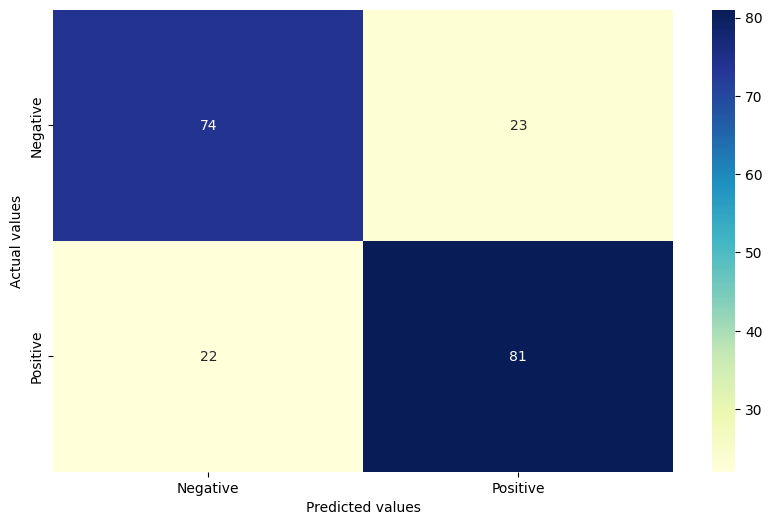

In [29]:
# Plotting the confusion matrix

import matplotlib.pyplot as plt       #Matplotlib is a low level graph plotting library in python that serves as a visualizatin utility
import seaborn as sns                 #Seaborn is a Python data visualization library based on matplotlib
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [30]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

Since, the data is fairly balanced, we are only concerned with accuracy_score. From above distinct classifiers and various Voting Classifier combinations, highest accuracy achieved was 81% with cross_val_score of 79.37% with Voting Classifier 2 (# VCLF2).